# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Other Libraries

# Visualizing NaN values
import missingno as msno

# Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Calendar
import calendar

# Geocode
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import folium
from folium import plugins
import ipywidgets
from branca.element import Figure


# Plotly Options and Config
pio.templates.default = 'plotly_white'
config = {'displayModeBar': False}
colors_x = ['#E0C95A', '#CBE0CA', '#E0864E', '#CDCCE3', '#E3B8D1']
cmaps = 'Blues'

In [3]:
df = pd.read_csv('./supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Branches Location

In [5]:
city_data = df.City.unique()
cities = pd.DataFrame(data = city_data, columns = {'city_name'})
cities

nom = Nominatim(user_agent='Kaggle')

def geo_cities(cities):
    lat = []
    long = []
    flag = 0
    for city in cities['city_name']:
      location = nom.geocode(city)
      try:
        lat.append(location.latitude)
        long.append(location.longitude)
        print(flag)
      except:
        lat.append('NA')
        long.append('NA')
      flag += 1
    cities['Latitude'] = lat
    cities['Longitude'] = long 
    
#geo_cities(cities)
# The geocoding doesn't seem to work in  kaggle notebook so i'll manually add  the output here.

cities = pd.DataFrame({'city_name': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.79671316,19.690708,21.981275],
                       'Longitude' : [96.160992, 96.165883, 96.082375]})

supermarket_geo = folium.Map(location = [19.680708,	96.265883], zoom_start = 7, tiles = 'CartoDB Positron', control_scale = True)

fig = Figure(width = 800, height = 600)
fig.add_child(supermarket_geo)

for (index, row) in cities.iterrows():
  folium.Marker(location = [row.loc['Latitude'], row.loc['Longitude']], popup = row.loc['city_name'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(supermarket_geo)

supermarket_geo

# Variable transformations

## Change the date variable to date

In [6]:
df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.day_name()

In [8]:
df['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [9]:
df['weekday'].head()

0    Saturday
1      Friday
2      Sunday
3      Sunday
4      Friday
Name: weekday, dtype: object

## Set the Date as the index of the dataset

In [10]:
df.set_index('Date', inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


# Univariate analysis

C:\Users\muazi\AppData\Local\Temp\ipykernel_9532\2669265483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


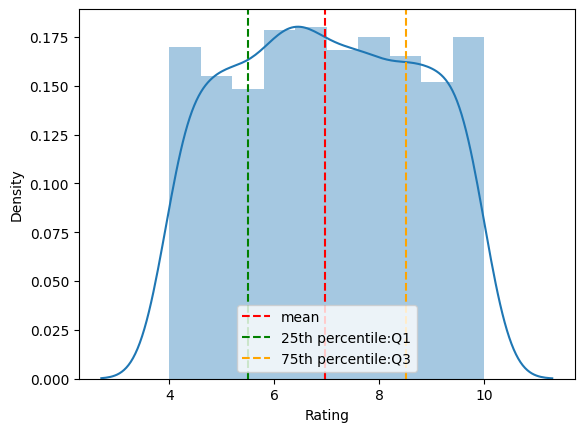

In [19]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [15]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [17]:
sns.countplot(df['Branch'])
sns.countplot(df['Payment'])

ValueError: could not convert string to float: 'Ewallet'